In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from pandas.plotting import scatter_matrix
%matplotlib inline

In [48]:
df = pd.read_csv('Credit.csv', index_col=0)
df.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


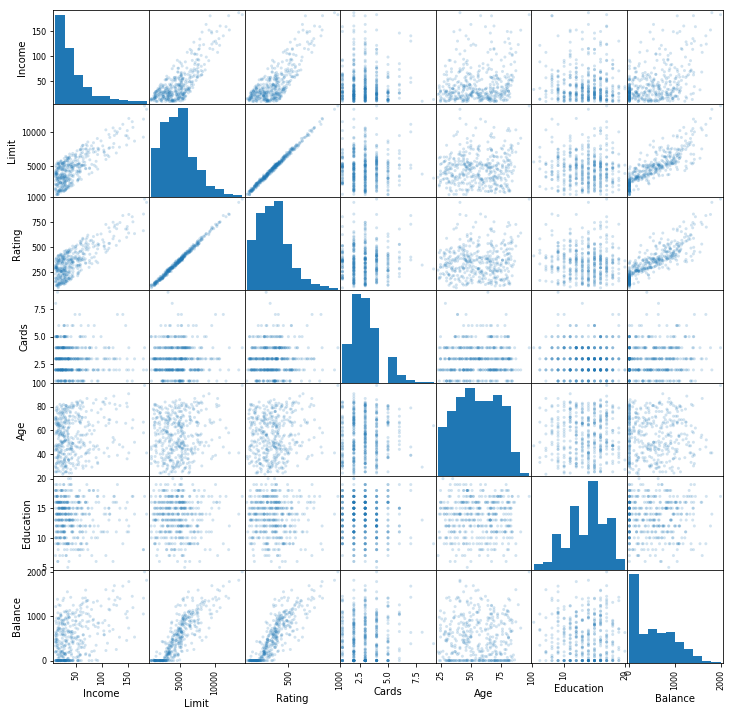

In [26]:
scatter_matrix(df, alpha=0.2, figsize=(12,12))
None

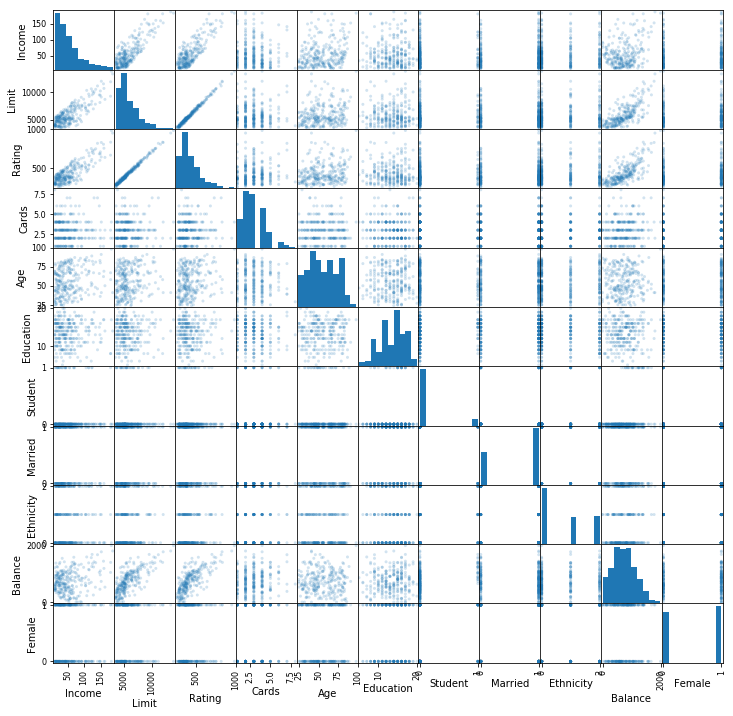

In [83]:
scatter_matrix(df, alpha=0.2, figsize=(12,12))
None

In [80]:
y = df.Balance
x = df[['Rating','Limit','Income','Student']]
x = sm.add_constant(x)

x.head()

,const,Rating,Limit,Income,Student
1,1.0,283,3606,14.891,0
2,1.0,483,6645,106.025,1
3,1.0,514,7075,104.593,0
4,1.0,681,9504,148.924,0
5,1.0,357,4897,55.882,0


In [81]:
model = sm.OLS(y, x).fit()

In [82]:
model.params

const     -721.436891
Rating       1.465357
Limit        0.225838
Income     -10.016818
Student    498.941211
dtype: float64

In [78]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                     6599.
Date:                Wed, 10 Jan 2018   Prob (F-statistic):          1.35e-261
Time:                        14:14:24   Log-Likelihood:                -1358.1
No. Observations:                 267   AIC:                             2726.
Df Residuals:                     262   BIC:                             2744.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -721.4369     11.733    -61.486      0.000    -744.541    -698.333
Rating         1.4654      0.199      7.370      0.000       1.074       1.857
Limit          0.2258      0.014     16.670      0.000       0.199       0.253
Income       -10.0168      0.110    -91.014      0.000     -10.234      -9.800
Student      498.9412      7.932     62.905      0.000     483.323     514.559
==============================================================================
Omnibus:                       20.831   Durbin-Watson:                   1.911
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               26.973
Skew:                           0.572   Prob(JB):                     1.39e-06
Kurtosis:                       4.056   Cond. No.                     3.02e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.02e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [42]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Income,400.0,45.218885,35.244273,10.354,21.00725,33.1155,57.47075,186.634
Limit,400.0,4735.600000,2308.198848,855.000,3088.00000,4622.5000,5872.75000,13913.000
Rating,400.0,354.940000,154.724143,93.000,247.25000,344.0000,437.25000,982.000
Cards,400.0,2.957500,1.371275,1.000,2.00000,3.0000,4.00000,9.000
Age,400.0,55.667500,17.249807,23.000,41.75000,56.0000,70.00000,98.000
Education,400.0,13.450000,3.125207,5.000,11.00000,14.0000,16.00000,20.000
Gender,400.0,0.517500,0.500319,0.000,0.00000,1.0000,1.00000,1.000
Student,400.0,0.900000,0.300376,0.000,1.00000,1.0000,1.00000,1.000
Married,400.0,0.387500,0.487790,0.000,0.00000,0.0000,1.00000,1.000
Ethnicity,400.0,0.247500,0.432100,0.000,0.00000,0.0000,0.00000,1.000


In [79]:
df = df[df.Limit > 3500]

In [21]:
#df.Limit = df[df.Limit > 3500].describe().T


In [44]:
df.head()


,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
1,14.891,3606,283,2,34,11,0,1,0,0,333
2,106.025,6645,483,3,82,15,1,0,0,0,903
3,104.593,7075,514,4,71,11,0,1,1,0,580
4,148.924,9504,681,3,36,11,1,1,1,0,964
5,55.882,4897,357,2,68,16,0,1,0,0,331


In [33]:
df.Gender = pd.get_dummies(df['Gender'])

In [34]:
df.head()


,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
1,14.891,3606,283,2,34,11,1,No,Yes,Caucasian,333
2,106.025,6645,483,3,82,15,0,Yes,Yes,Asian,903
3,104.593,7075,514,4,71,11,1,No,No,Asian,580
4,148.924,9504,681,3,36,11,0,No,No,Asian,964
5,55.882,4897,357,2,68,16,1,No,Yes,Caucasian,331


In [52]:
df.Student = pd.get_dummies(df['Student'])
df.Married = pd.get_dummies(df['Married'])
df.Ethnicity = pd.get_dummies(df['Ethnicity'])
df.Gender = pd.get_dummies(df['Gender'])


In [53]:
df.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
1,14.891,3606,283,2,34,11,1,1,0,0,333
2,106.025,6645,483,3,82,15,0,0,0,0,903
3,104.593,7075,514,4,71,11,1,1,1,0,580
4,148.924,9504,681,3,36,11,0,1,1,0,964
5,55.882,4897,357,2,68,16,1,1,0,0,331


SyntaxError: invalid syntax (<ipython-input-51-5b447b94c268>, line 1)

In [50]:
##df = pd.concat([df.drop('YEAR', axis=1), pd.get_dummies(df['YEAR'])], axis=1)

ValueError: labels ['YEAR'] not contained in axis

In [66]:
df = pd.read_csv('Credit.csv', index_col=0)
df = df[df.Limit > 3500]
df['Student'] = df.Student.map({'No':0, 'Yes':1})
df['Married'] = df.Married.map({'No':0, 'Yes':1})
df['Ethnicity'] = df.Ethnicity.map({'Caucasian':0, 'Asian':1, 'African American':2})
df['Female'] = pd.get_dummies(df.Gender)['Female']
df.drop(['Gender'], axis=1, inplace=True)
df.head(3)

,Income,Limit,Rating,Cards,Age,Education,Student,Married,Ethnicity,Balance,Female
1,14.891,3606,283,2,34,11,0,1,0,333,0
2,106.025,6645,483,3,82,15,1,1,1,903,1
3,104.593,7075,514,4,71,11,0,0,1,580,0
